<a href="https://colab.research.google.com/github/ThangDoan2001/API-Python-Learn/blob/master/SVD_GaussianBlur_CountObjects.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import math
import operator

In [3]:
3.6e2 - 108

252.0

## HW1

Tìm Singular Value Decomposition của $\mathbf{A}$, ($\mathbf{U},\mathbf{\Sigma}, \mathbf{V^T}$) 
$$\mathbf{A} = 
\begin{bmatrix}
4 & 11 & 14\\
8 & 7 & -2
\end{bmatrix}
$$

Các bạn có thể trình bày trên words, latex files, hoặc viết ra giấy và chụp hình.

**Gợi ý**: **Đây chỉ là 1 trong các cách giả bài toán, các bạn có thể làm các cách khác không giống cách này vẫn được**
- Bước1: Tìm right singular vectors (columns của $\mathbf{V}$) $\mathbf{A^TA}$
    - Tìm ma trận $\mathbf{A^TA}$
    - Tìm eigenvalue của $\mathbf{A^TA}$ => Tìm singular values là căn bậc 2 của eigenvalues
    - Tìm eigenvectorector của $\mathbf{A^TA}$
- Bước2: Tìm  $\mathbf{\Sigma}, \mathbf{V}$
    - Sắp xếp các singular values theo thứ tự từ lớn đến bé. Hình thành ma trận đường chéo vuông có kích thuớc là số lượng singular values, (đường chéo là các singular values vị trí 00, 11, 22, ... các vị trí còn lại = 0). Sau đó padding = 0 để ma trận này có kích thước = ma trận $\mathbf{A}$. Thu được $\mathbf{\Sigma}$
    - Đặt các eigenvectors theo thứ tự có eigenvalue tương ứng từ lớn đến bé (trái qua phải), thu được $\mathbf{V}$
- Bước3: Tìm $\mathbf{U}$
    - Làm tương tự Bước1, Bước2 (bỏ bước Tìm  $\mathbf{\Sigma}$) với $\mathbf{AA^T}$ để thụ được $\mathbf{U}$ tương tự như $\mathbf{V}$

**MY SOLUTION**


In [4]:
A = np.array([[4, 11, 14],
              [8, 7, -2]])
ATA = A.T @ A

In [5]:
eigen_values, eigen_vectors = np.linalg.eig(ATA)
eigen_values = eigen_values.astype(np.uint)
singular_values = np.sqrt(eigen_values)

eigens = []
for i in range(eigen_values.shape[0]):
  eigens.append((eigen_values[i], singular_values[i], eigen_vectors[i].reshape(1, -1)))
eigens.sort(key=operator.itemgetter(0), reverse=True)
eigens = np.array(eigens)
diag_mat = np.zeros(A.shape)

for i in range(A.shape[0]):
  diag_mat[i][i] = eigens[i][1]
print(diag_mat)
VT_mat = np.array(eigens[:, 2])
VT_mat = np.concatenate(VT_mat)
VT_mat.shape

[[18.97366596  0.          0.        ]
 [ 0.          9.43398113  0.        ]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  if __name__ == '__main__':


(3, 3)

In [6]:
AAT = A @ A.T

eigen_values, eigen_vectors = np.linalg.eig(AAT)
eigen_values = eigen_values.astype(np.uint)
singular_values = np.sqrt(eigen_values)

eigens = []
for i in range(eigen_values.shape[0]):
  eigens.append((eigen_values[i], singular_values[i], eigen_vectors[i].reshape(1, -1)))
eigens.sort(key=operator.itemgetter(0), reverse=True)
eigens = np.array(eigens)

U_mat = np.array(eigens[:, 2])
U_mat = np.concatenate(U_mat)
U_mat.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  # This is added back by InteractiveShellApp.init_path()


(2, 2)

In [7]:
U_mat@diag_mat@VT_mat.T # bị ngược dấu

array([[ -4.01114215, -11.00557107, -13.98885785],
       [ -7.96657356,  -6.98328678,   1.96657356]])

## HW2

Viết function sử dụng Singular Value Decomposition để nén một ảnh màu với k components.

- Input: ảnh màu, k số lượng components muốn giữ lại 
- Output: ảnh sau khi nén
- **Lưu ý: các bạn chọn bất kỳ ảnh màu nào cũng được** 

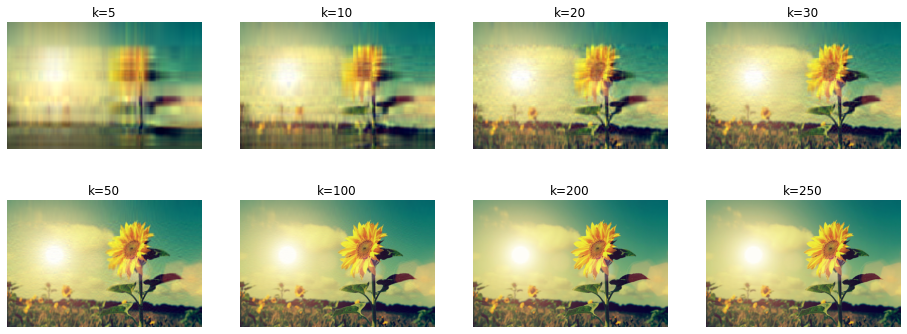

**NOTE**

U : left singular vectors

V : right singular vectors

Eigenvalue càng lớn thì thông tin càng quan trọng

SVD cung cấp:
* Những thông tin nào là quan trọng nhất
* Số lượng thông tin được giữ lại



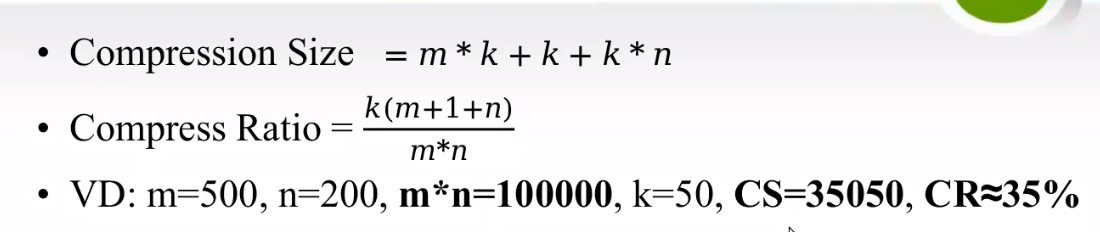

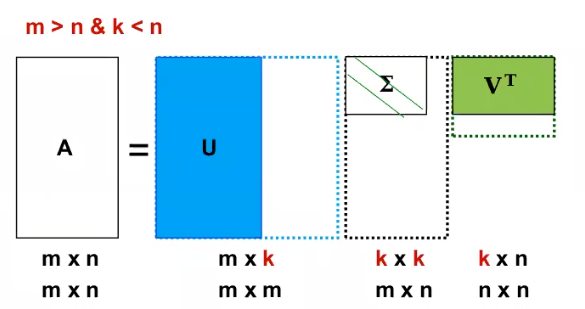

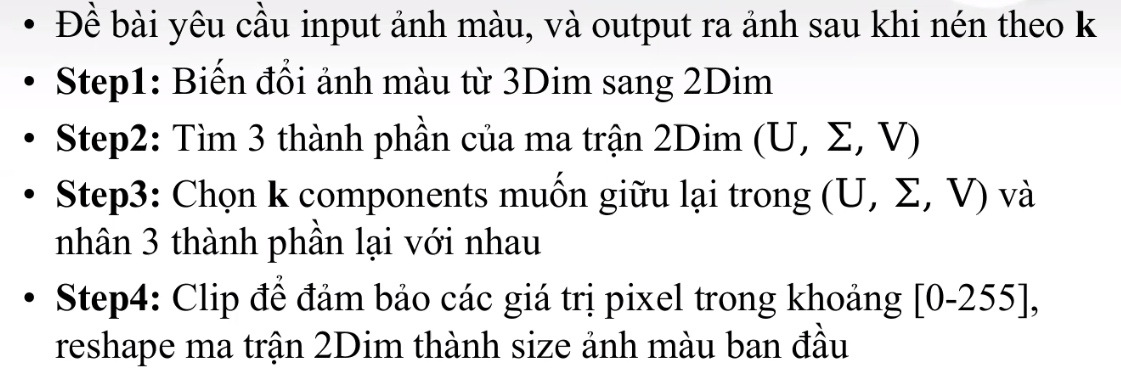

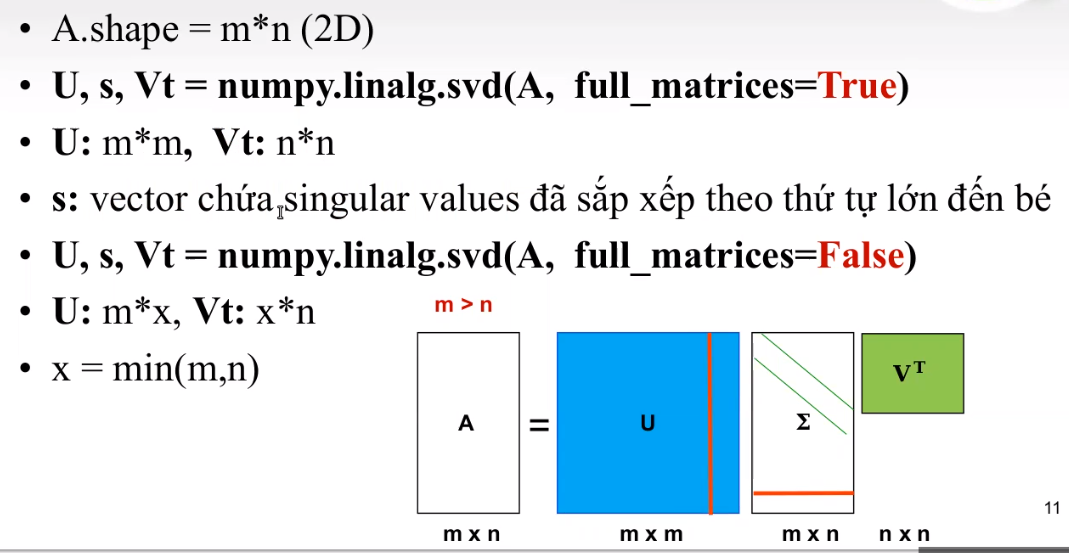

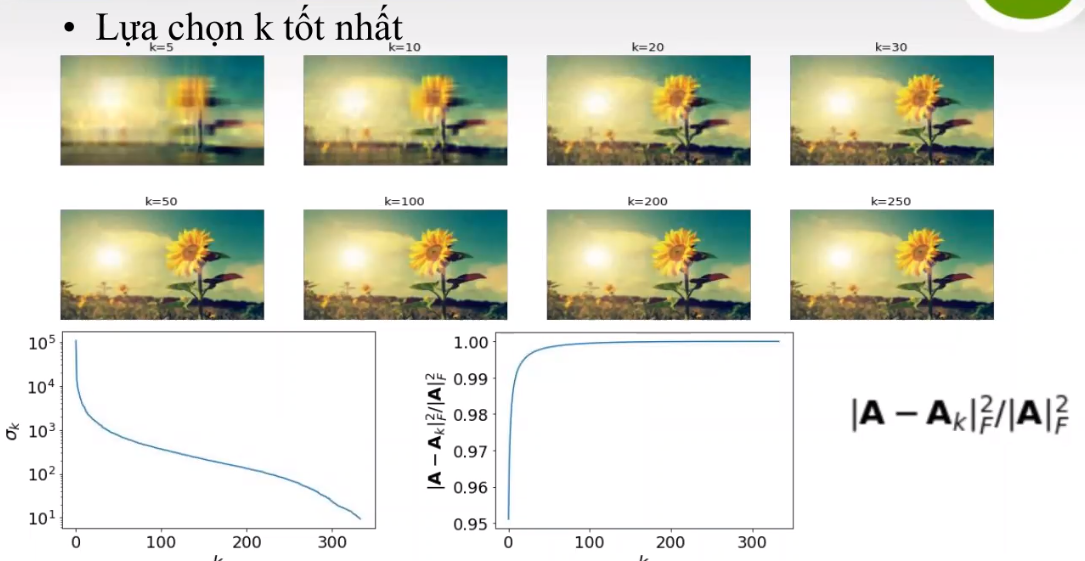

Số thông tin nhận được là như nhau vì phần dưới của ma trận singular là 0 nên những hàng phía sau không có giá trị sử dụng


**MY SOLUTION**

In [8]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt

def singular_value_decomposition(img_path, k) :
  img = cv2.imread(img_path)
  h, w = img.shape[:2]
  img_mat = np.reshape(img, (h, -1)) # (h, w, c) -> (h, w*c)

  # Singular Value Decomposition
  U_mat, s, VT_mat = np.linalg.svd(img_mat, full_matrices = False)
  S_mat = np.diag(s)

  new_image_mat = U_mat[:, :k] @ S_mat[:k, :k] @ VT_mat[:k ,:]
  new_image = np.clip(new_image_mat.reshape(h, w, -1), 0, 255)
  return new_image

def show_with_different_k_values(img_path, k_list):
  fig = plt.figure(figsize = (15, 5))
  for i in range(8):
    im = singular_value_decomposition(img_path, k_list[i])
    fig.add_subplot(2, 4, i + 1)
    plt.title('k = {}'.format(k_list[i]))
    plt.axis('off')
    plt.imshow(im[...,::-1].astype(np.uint8))
  plt.show()

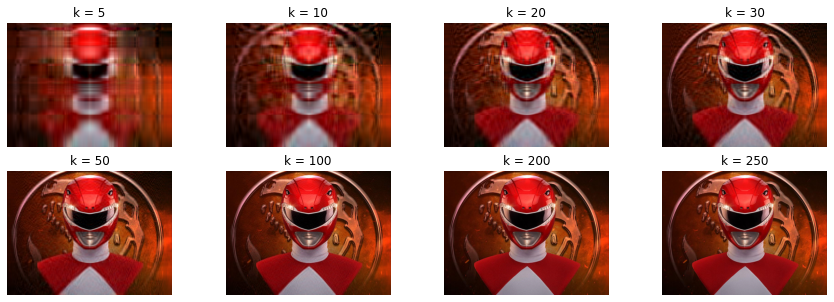

In [9]:
k_list = [5, 10, 20, 30, 50, 100, 200, 250]
img_path = '/content/drive/MyDrive/ColabNotebooks/power_ranger.jpg'
show_with_different_k_values(img_path, k_list)

## HW3 (Optional)

Viết phương trình tìm các giá trị xấp xỉ của a, b, c, d trong hệ phương trình dưới đây (**không dùng np.linalg.pinv**):

$
\begin{align}
a - c + 2d &= -1\\
a + b + c - 1d &= 2\\
-b - 2c + 3d &= -3\\
5a + 2b + -c + 4d &= 1\\
-a + 2b + 5c + 8d &= 7\\
\end{align}
$

- Tìm hiểu phương pháp áp dụng SVD gọi là Moore–Penrose pseudoinverse. Viết công thức để tìm được kết quả xấp xỉ  
- Thực hiện code để tìm kết quả theo công thức

**NOTE**

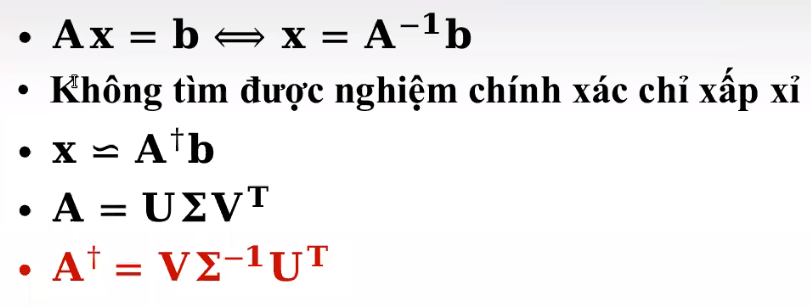

**MY SOLUTION**


In [10]:
import numpy as np
def solution(A, b):
  U_mat, s, VT_mat = np.linalg.svd(A, full_matrices=False)
  rank_A = np.linalg.matrix_rank(A)
  n = A.shape[1]

  sigma_inv = np.diag(np.hstack([1/s[:rank_A], np.zeros(n-rank_A)]))
  A_dagger = VT_mat.T @ sigma_inv @ U_mat.T
  # Find result 
  x = A_dagger @ b
  return x

In [11]:
A = np.array([[1, 0, -1, 2],
              [1, 1, 1, -1],
              [0, -1, -2, 3],
              [5, 2, -1, 4],
              [-1, 2, 5, 8]])
b = np.array([-1, 2, -3, 1, 7])
solution(A, b)

array([0.16666667, 0.66666667, 1.16666667, 0.        ])

In [12]:
np.linalg.pinv(A) @ b

array([ 1.66666667e-01,  6.66666667e-01,  1.16666667e+00, -2.01227923e-16])

## HW4


$G(x,y) = \dfrac{{\mathrm{e}}^{-(\dfrac{x^2+y^2}{2\,s^2})}}{2\,s^2\,\pi }$

x,y: là vị trí các pixel trong ảnh 2D

s: là standard deviation (độ lệch chuẩn)



- a) Sẽ như thế nào, nếu thay đổi độ lệch chuẩn của hàm số Gaussian ở trên (các bạn vizualize được thì càng tốt ạ)
- b) Các bạn tìm hiểu về Gaussian filter và hãy tự xây dựng Gaussian filter, sử dụng ảnh theo link bên dưới để test kết quả hàm của mình (chỉ sử dụng cv2.filter2D, không sử dụng cv2.gaussianblur). Sau đó các bạn có thể so sánh với hàm cv2.gaussianblur của opencv để kiểm tra kết quả.

link image: https://drive.google.com/file/d/1HxUvUI6YhjuXvk-ZduGLU204xqfAmXG1/view?usp=sharing

a) ví dụ khi thay độ lệch chuẩn s=1, và s=11


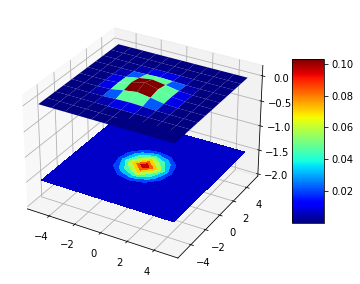

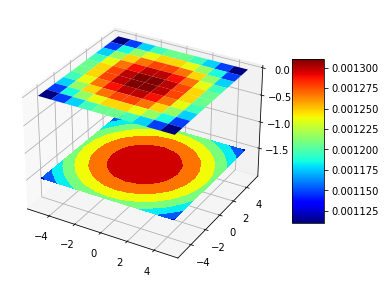

b) ví dụ output Gaussian filter của hàm tự viết và dùng opencv

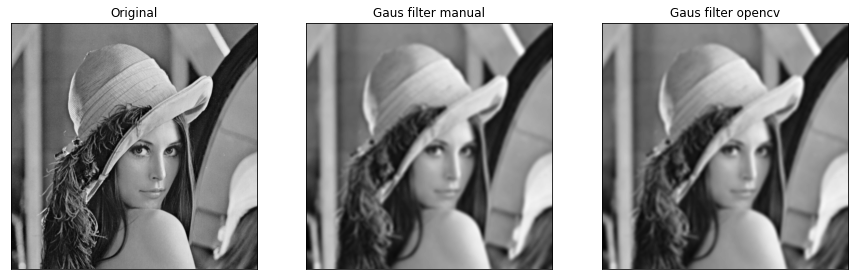

**NOTE**

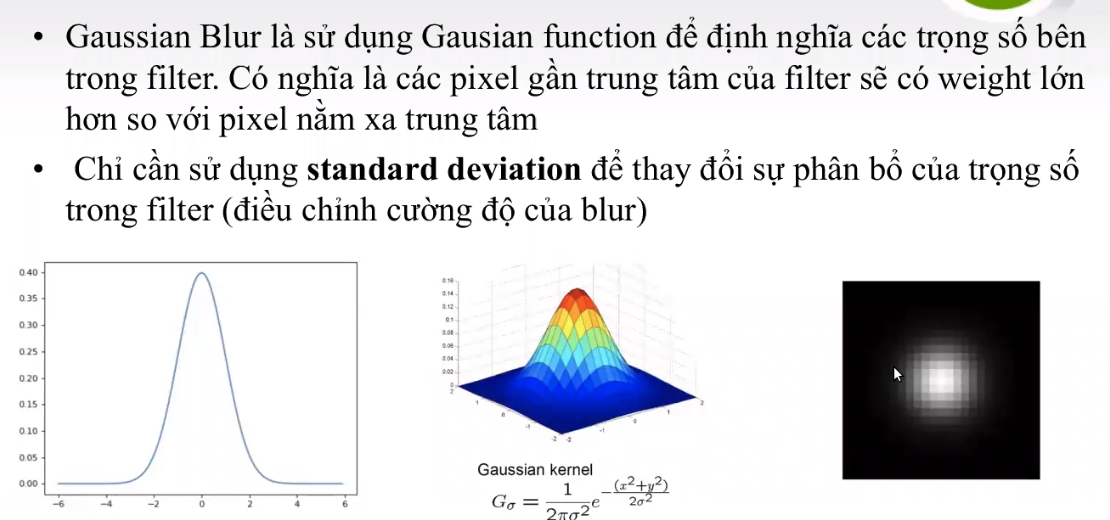

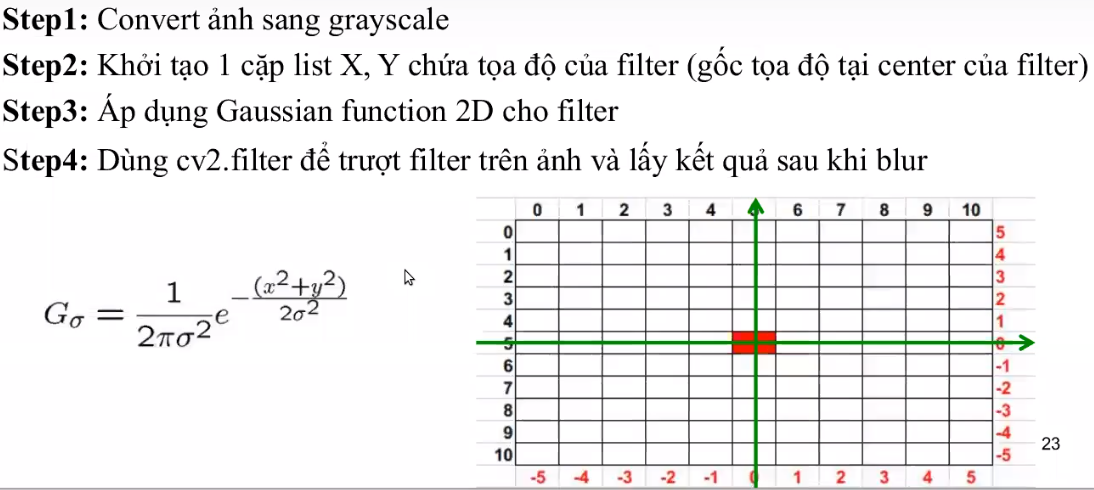

**MY SOLUTION**

In [13]:
import cv2 
import matplotlib.pyplot as plt

def solution(img_path, kernel_size, sigma=3):
  gray_img = cv2.imread(img_path, 0)

  center = kernel_size//2
  x_range = np.arange(-center, center + 1, 1)
  y_range = x_range

  X,Y = np.meshgrid(x_range, y_range)
  
  kernel = np.exp((-(X**2 + Y**2))/(2*sigma**2))/(2*np.pi*sigma**2)
  
  new_img = cv2.filter2D(gray_img, -1, kernel)
  return new_img

def solution_openCV(img_path, kernel_size, sigma=3):
  gray_img = cv2.imread(img_path, 0)

  kernel = cv2.getGaussiankernel(kernel_size, sigma)
  new_img = cv2.GaussainBlur(gray_img, (kernel_size, kernel_size), sigma, sigma)
  return new_img

def show_results(img_path, kernel_size, sigma):
  my_new_img = solution(img_path, kernel_size, sigma)
  opencv_new_img = solution(img_path, kernel_size, sigma)

  fig, axes = plt.subplots(1, 3, sharex='all', sharey='all', figsize=(15, 15))
  axes[0].imshow(cv2.imread(img_path, 0), cmap="gray")
  axes[0].set_title('Original')
  axes[0].set_xticks([])
  axes[0].set_yticks([])

  axes[1].imshow(my_new_img, cmap="gray")
  axes[1].set_title('Gaussain Filter Manual')
  axes[1].set_xticks([])
  axes[1].set_yticks([])

  axes[2].imshow(opencv_new_img, cmap="gray")
  axes[2].set_title('Gaussian Filter OpenCV')
  axes[2].set_xticks([])
  axes[2].set_yticks([])

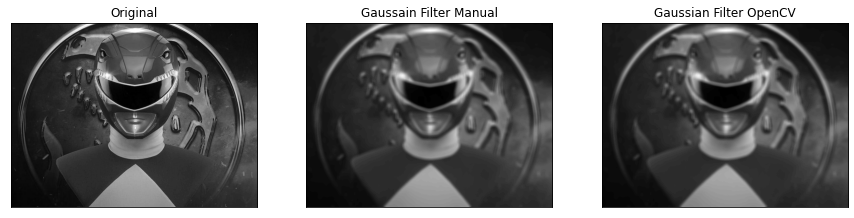

In [14]:
img_path = '/content/drive/MyDrive/ColabNotebooks/power_ranger.jpg'
show_results(img_path, 11, 7)

## HW5 (Optional)

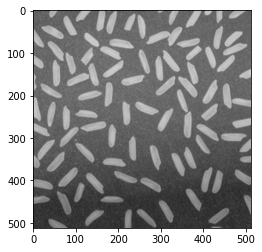

Cho input như hình trên, các bạn hãy vận dụng và tìm hiểu thêm các kiến thức xử lý anh của mình (dùng opencv hoặc PIL đều được) để đếm số hạt gạo trong hình (ko cần chính xác hoàn toàn số lượng)

- Input: rice.png
- Output: Trả về số hạt gạo có trong hình 

link image: https://drive.google.com/file/d/1tZKNiXPDAbVVkHvCJEuT1qgZQoZ8zCBk/view?usp=sharing

**NOTE**

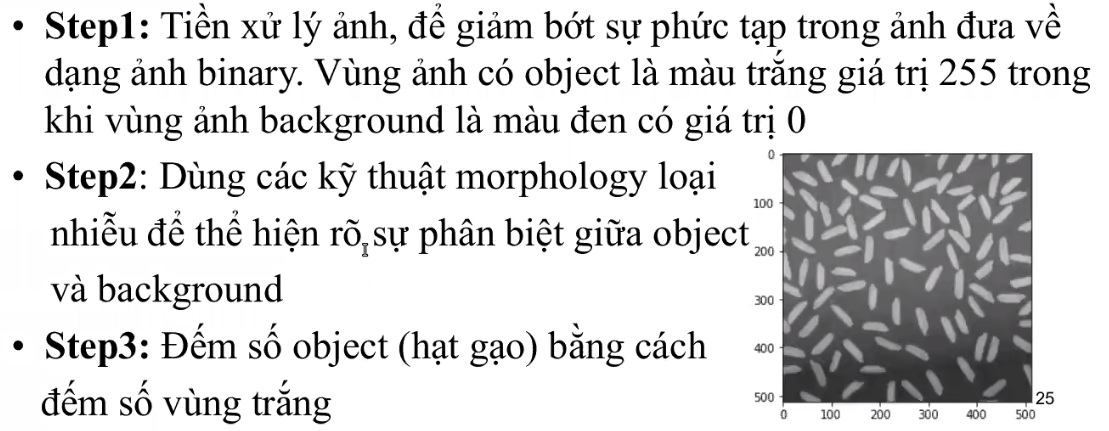

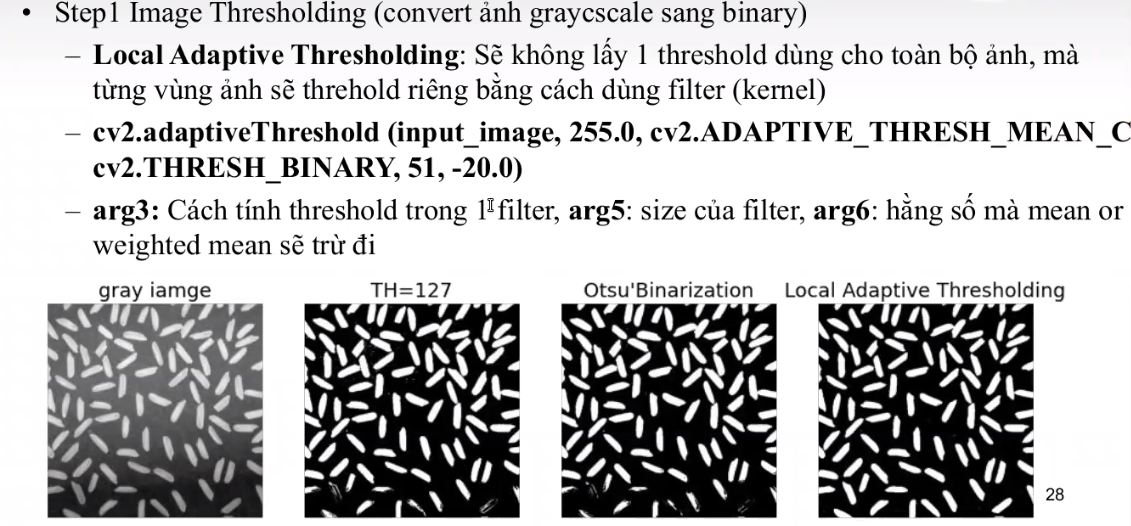

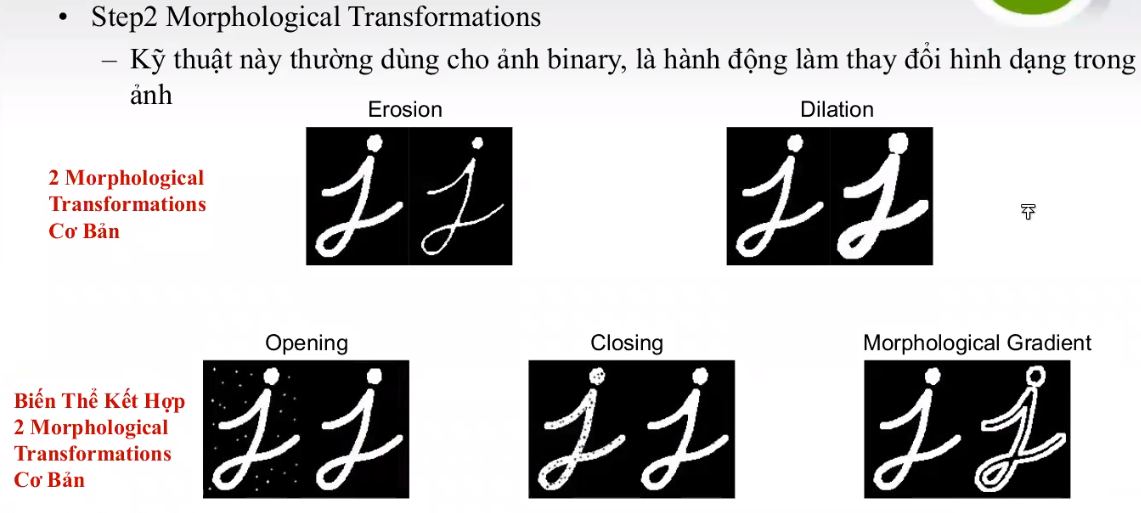

**STEP 1**

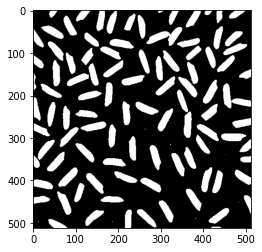

In [16]:
# Step 1
import cv2
import numpy as np
import matplotlib.pyplot as plt

# load input images for demonstration
img = cv2.imread("/content/drive/MyDrive/ColabNotebooks/rice.png", 0)

# local adaptive thresholding - computes local threshold based on given window size
output_adapthresh = cv2.adaptiveThreshold(img, 255.0, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 51, -20.0)

plt.imshow(output_adapthresh, 'gray')


**STEP 2** Using erosion

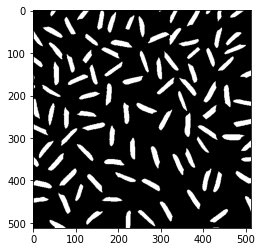

In [17]:
# Step 2
# morphologial erosino - cleaning up binary images
kernel = np.ones((5, 5), np.uint8)
output_erosion = cv2.erode(output_adapthresh, kernel)
plt.imshow(output_erosion, 'gray')

**STEP 3**

Number of foreground objects 102


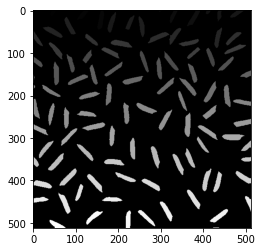

In [19]:
# Step 3 cách 1: Flood fill
# Counts and marks number of distinct foreground objects
# apply connected components on clean binary image
label_image = output_erosion.copy()
label_count = 0
rows, cols = label_image.shape
for j in range(rows):
  for i in range(cols):
    pixel = label_image[j, i]
    if pixel == 255:
      label_count += 1
      cv2.floodFill(label_image, None, (i, j), label_count)
print("Number of foreground objects", label_count)
plt.imshow(label_image, 'gray')

Number of deteced contours 101


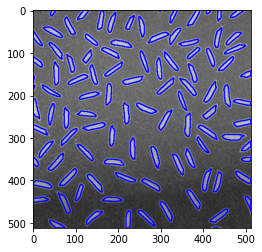

In [22]:
# Step 3 cách 2
contours, _ = cv2.findContours(output_erosion, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
output_contour = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
cv2.drawContours(output_contour, contours, -1, (0, 0, 255), 2)
print("Number of deteced contours", len(contours))
plt.imshow(output_contour, 'gray')